# Ejercicio 5

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('datos2(1).csv')



df

,age,lwt,race,smoke,ptd,ht,ui,ftv,bwt
0,19,182,2,0,0,0,1,0,2523
1,33,155,3,0,0,0,0,3,2551
2,20,105,1,1,0,0,0,1,2557
3,21,108,1,1,0,0,1,2,2594
4,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...
184,28,95,1,1,0,0,0,2,2466
185,14,100,3,0,0,0,0,2,2495
186,23,94,3,1,0,0,0,0,2495
187,17,142,2,0,0,1,0,0,2495


/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jl_deleon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWa

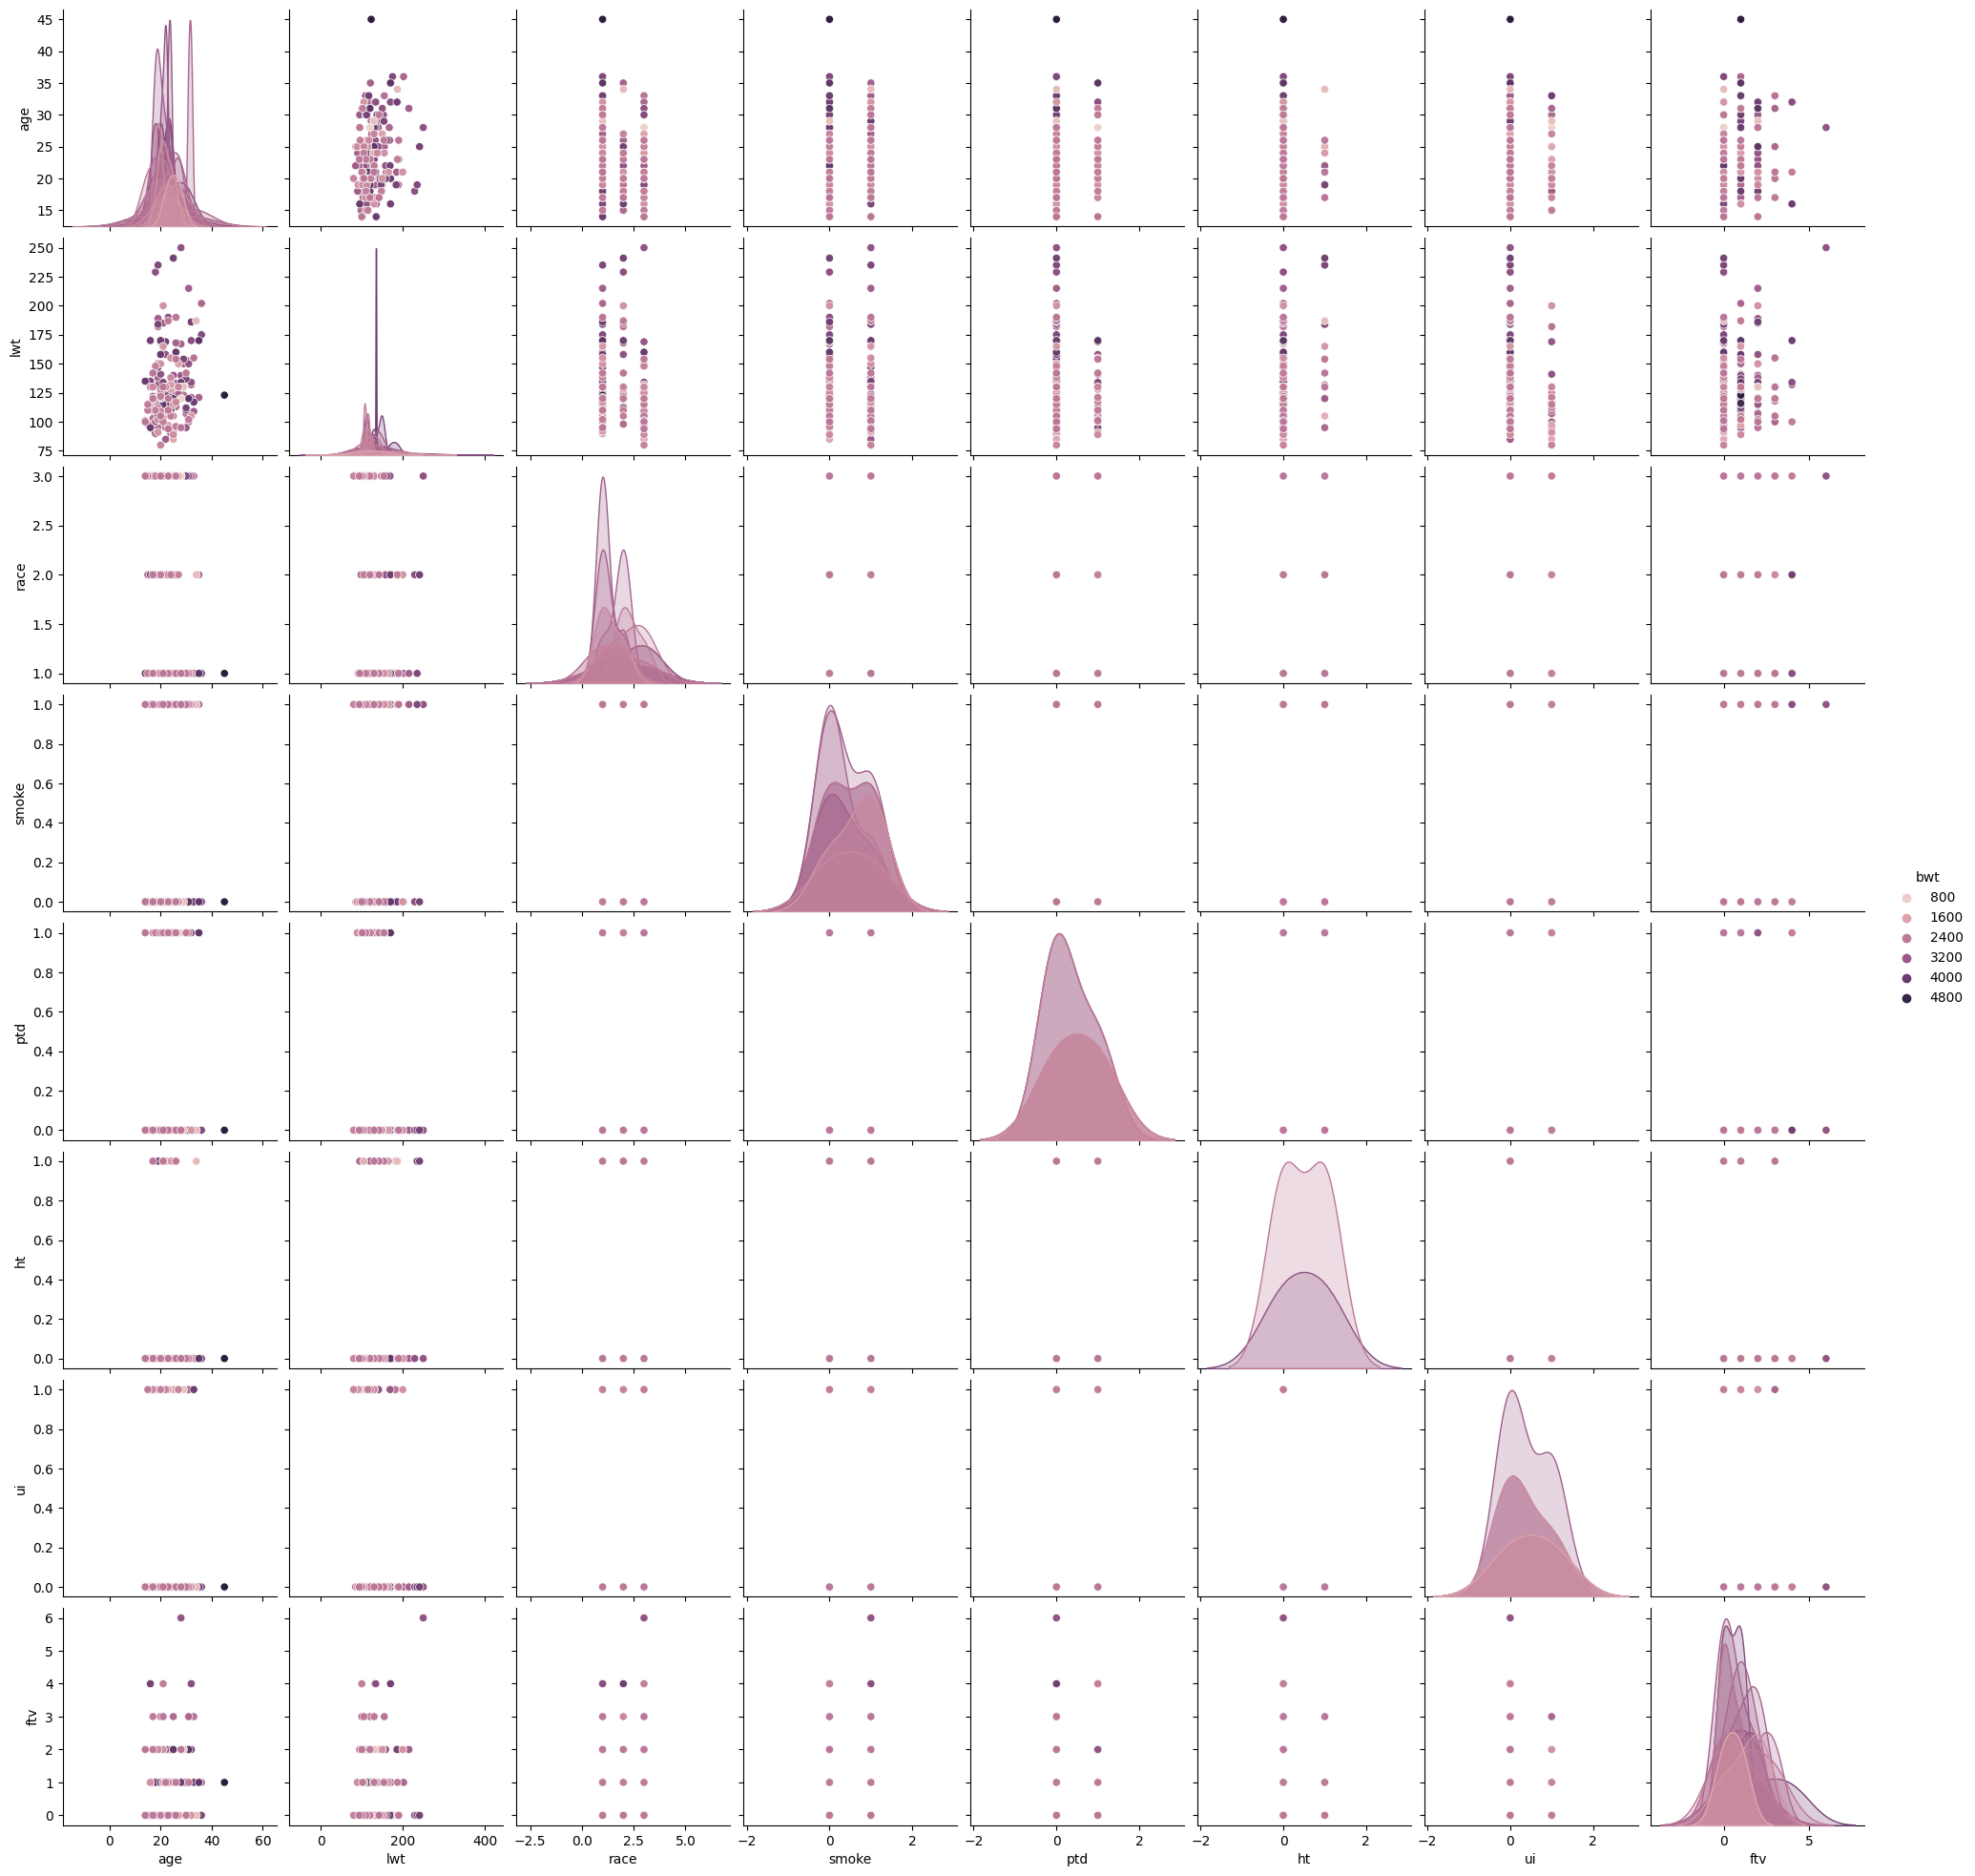

In [7]:
sns.pairplot(df, hue="bwt")

# Mostrar el gráfico
plt.show()

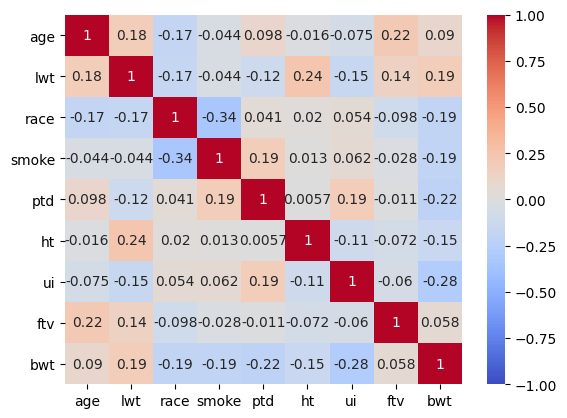

In [8]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.show()


In [14]:
import statsmodels.api as sm

# Crear variables binarias para la raza
df['race_white'] = (df['race'] == 1).astype(int)
df['race_black'] = (df['race'] == 2).astype(int)

# Seleccionar las variables predictoras (X) y la variable dependiente (y)
X = df[['age', 'lwt', 'race_white', 'race_black', 'smoke', 'ptd', 'ht', 'ui']]
y = df['bwt']

# Agregar una constante al conjunto de variables predictoras (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal con variables categóricas
model = sm.OLS(y, X).fit()

# Obtener un resumen del modelo
print(model.summary())

# Obtener los residuos del modelo
residuals = model.resid

# También puedes obtener otras estadísticas relacionadas con los residuos
print("Estadísticas sobre los residuos:")
print("Media de los residuos:", residuals.mean())
print("Desviación estándar de los residuos:", residuals.std())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     7.528
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.18e-08
Time:                        21:04:50   Log-Likelihood:                -1486.3
No. Observations:                 189   AIC:                             2991.
Df Residuals:                     180   BIC:                             3020.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2580.7070    280.969      9.185      0.0

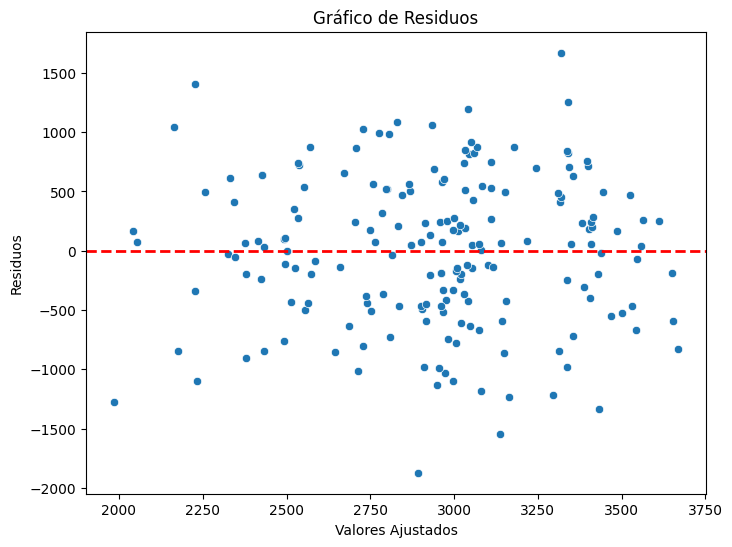

In [15]:
# Crear un gráfico de dispersión de los residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

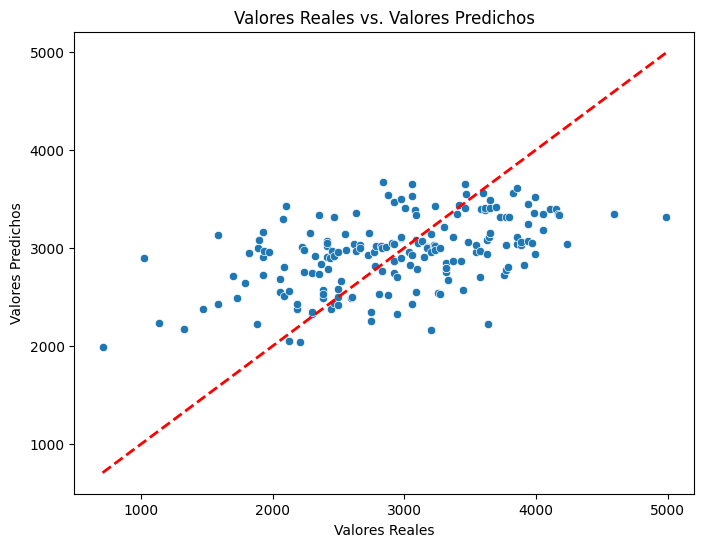

In [16]:
# Obtener los valores ajustados por el modelo
predicted_values = model.fittedvalues
# Crear un gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)  # Línea de referencia y=x
plt.title('Valores Reales vs. Valores Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

# Comentarios

Después de analizar con varias variables del data set el modelo que mejor se ajusta es quitando la variable del ftv: visitas al médico durante los primeros tres meses del embarazo.

Esto tambien se puede ver en que es de las variables que menos correlación tiene en nuestra matriz de correlación, hablando de razones reales puede deberse a que visitas al medico durante los primeros tres meses del embarazo no tiene alguna relación proporcional con el peso, ya que se puede interpretar que muchas visitas al médico puede significar un estado delicado del embarazo lo que puede resultar en un peso bajo, pero se puede hacer la misma interpretación de pocas visitas.